 Prepare the general libraries.

In [9]:
# libraries
library(community)
library(ggplot2)

 Prepare the path.

In [10]:
# the path to the counts, cell annotation and sample annation file. In this case its our working dir same as
# the notebook
path_in <- 'input_data/'

print("path_in")
print(path_in)

[1] "path_in"
[1] "input_data/"


Load data.

In [11]:
suppressWarnings(load(paste0(path_in,"/interactions.RData")))

Load functions for visualization.

In [12]:
data("visualization_functions")

## Parameters

In [13]:
# threshold for log2FC of the weights
threshold_log2FC <- interactions$thresholds$threshold_log2FC

idx_up <- interactions$anno_interactions$log2FC_weights > threshold_log2FC
idx_unchanged <- abs(interactions$anno_interactions$log2FC_weights)<= threshold_log2FC
idx_down <- interactions$anno_interactions$log2FC_weights < -threshold_log2FC
idx_sign <- !is.na(interactions$anno_interactions$sign) & interactions$anno_interactions$sign
idx_good <- interactions$anno_interactions$passed_QC_filter

In [14]:
# extract cell types
cell_types <- unique(interactions$anno_cells$cell_type)
print(cell_types)

[1] "Mono" "Gran" "T"    "NK"   "B"    "HSPC" "Ery"  "DC"  


### Forest plots

In [15]:
library(gridExtra) 

In [16]:
ordered_IDs <- order_IDs_by_interaction_categories(interactions)
# print(str(ordered_IDs))
print(length(unlist(ordered_IDs)))

[1] 7326


#### Split by category

In [17]:
component_lim <- find_component_limits(interactions, ordered_IDs)

print(str(component_lim))

List of 14
 $ log2FC_w_min    : num -16.2
 $ log2FC_w_max    : num 15.4
 $ log2FC_rho_s_min: num -1.37
 $ log2FC_rho_s_max: num 2.18
 $ log2FC_phi_s_min: num -6.44
 $ log2FC_phi_s_max: num 5.69
 $ log2FC_p_s_min  : num -4.22
 $ log2FC_p_s_max  : num 1.1
 $ log2FC_rho_r_min: num -1.37
 $ log2FC_rho_r_max: num 2.18
 $ log2FC_phi_r_min: num -6.5
 $ log2FC_phi_r_max: num 5.65
 $ log2FC_p_r_min  : num -2.29
 $ log2FC_p_r_max  : num 1.14
NULL


In [18]:
# load("felix_vis.RData")

In [19]:
# Combine IDs of significantly upregulated and downregulated interactions
significant_interaction_ids <- unique(c(interactions$anno_interactions$interaction_ID[idx_up & idx_sign], 
                                       interactions$anno_interactions$interaction_ID[idx_down & idx_sign]))

In [20]:
length(significant_interaction_ids)

[1] 2664

In [21]:
IDs <- as.character(c(significant_interaction_ids
                     ))

[1] "Cell Type: Mono - Number of interactions: 453"
[1] "Cell Type: Gran - Number of interactions: 409"


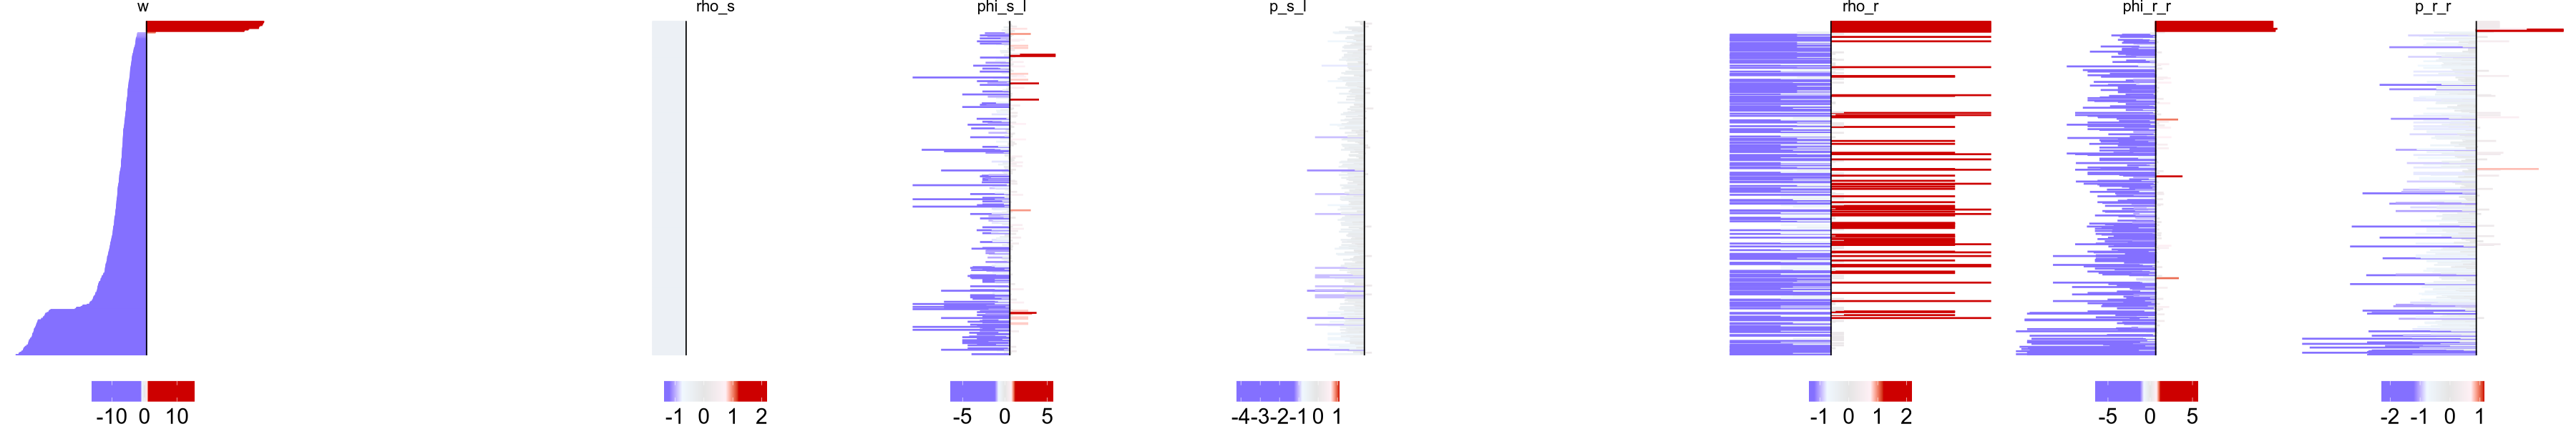

[1] "Cell Type: T - Number of interactions: 191"


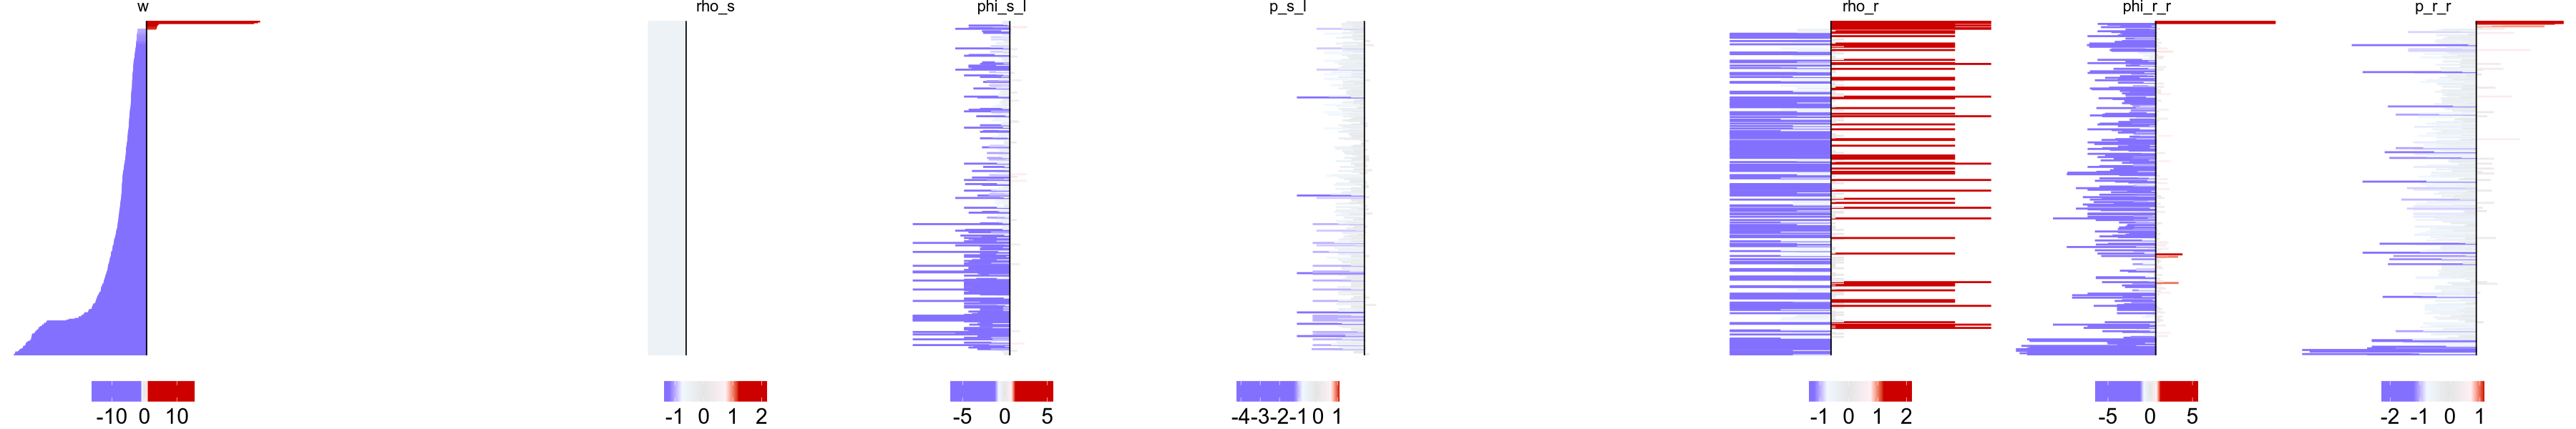

[1] "Cell Type: NK - Number of interactions: 213"


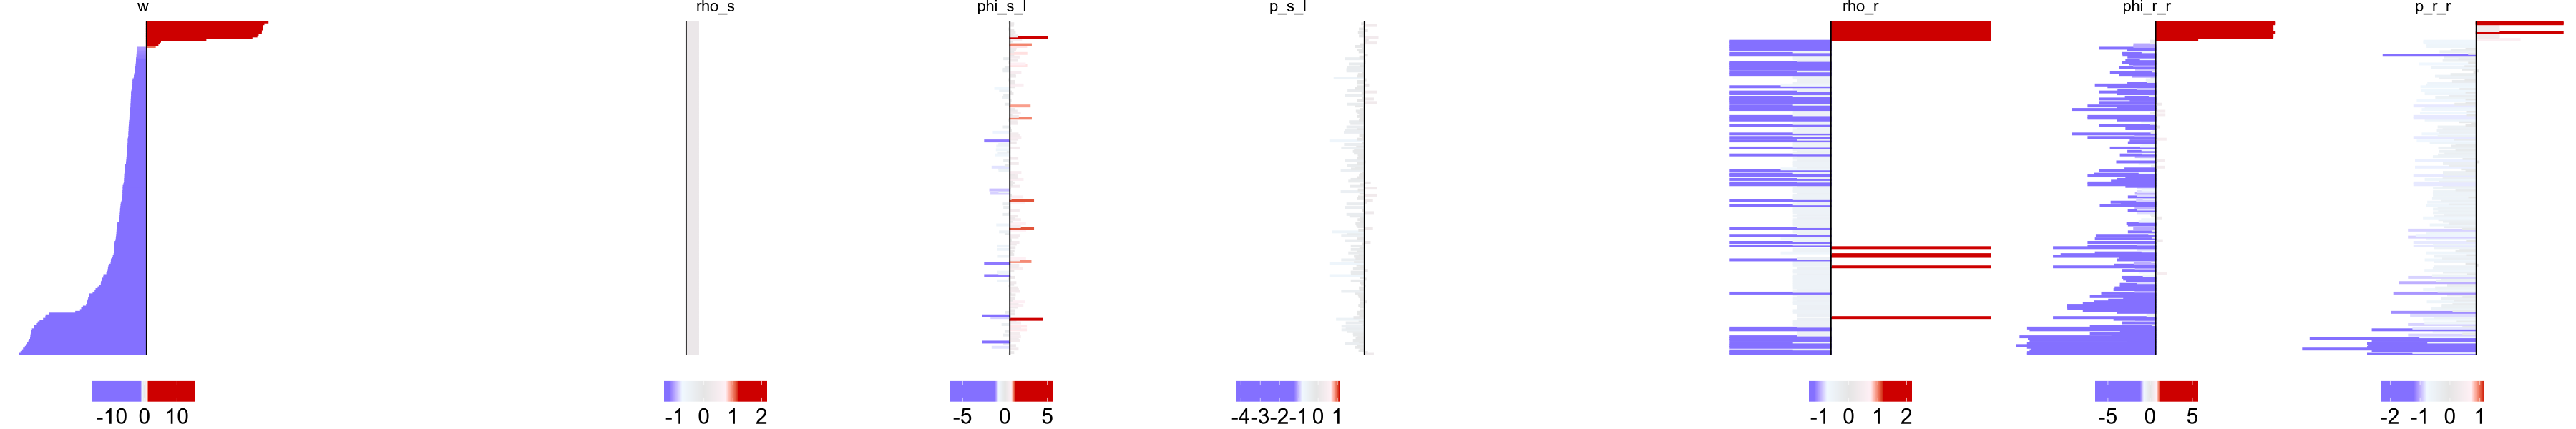

[1] "Cell Type: B - Number of interactions: 248"


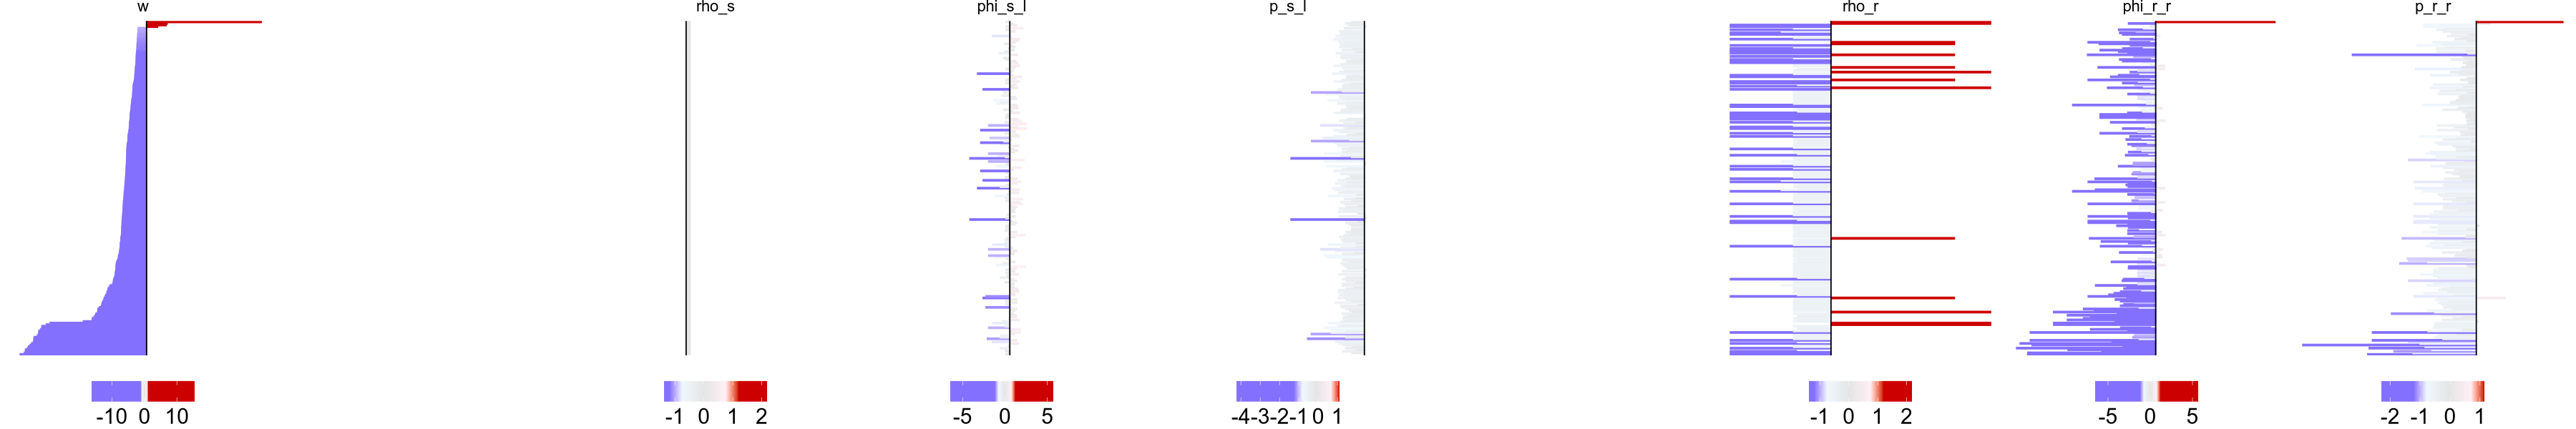

[1] "Cell Type: HSPC - Number of interactions: 149"


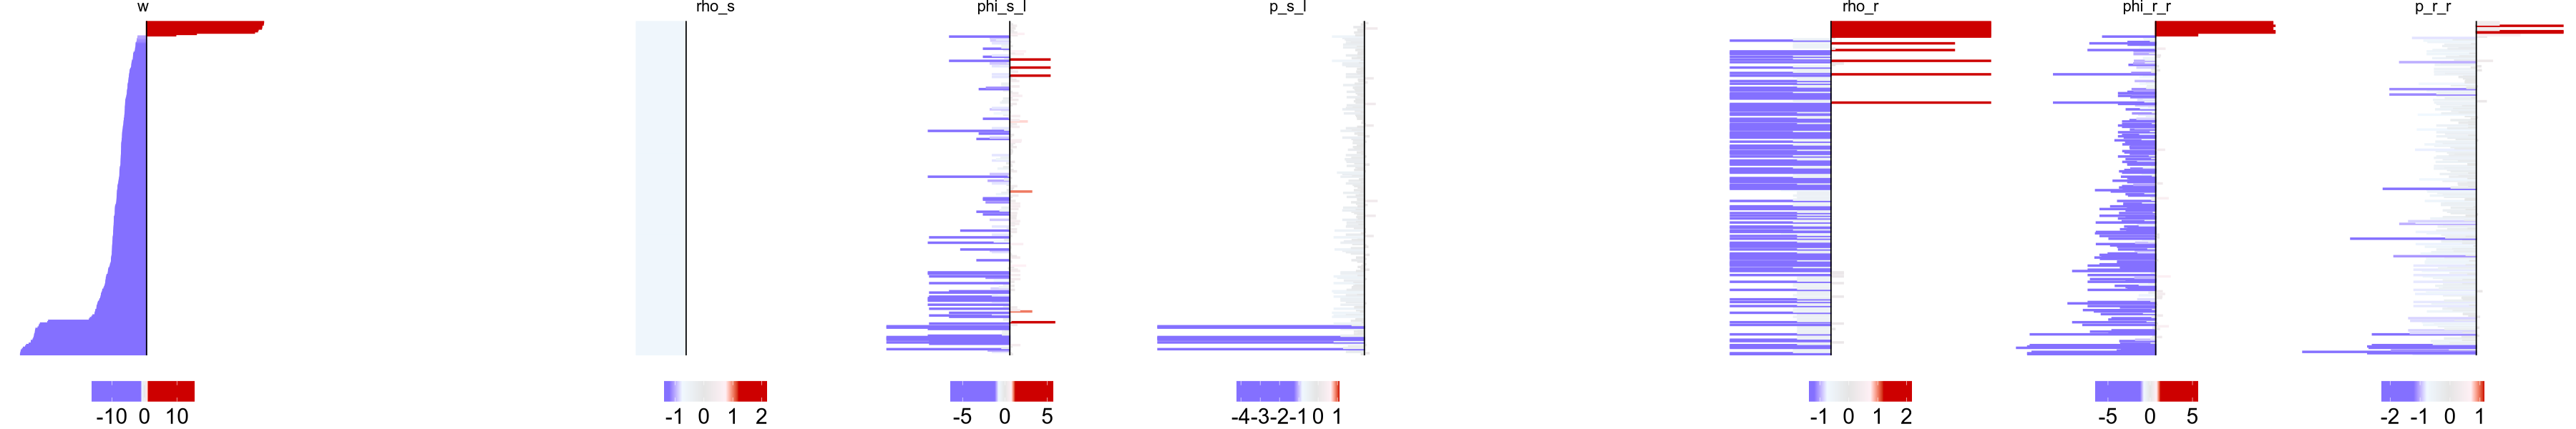

[1] "Cell Type: Ery - Number of interactions: 269"


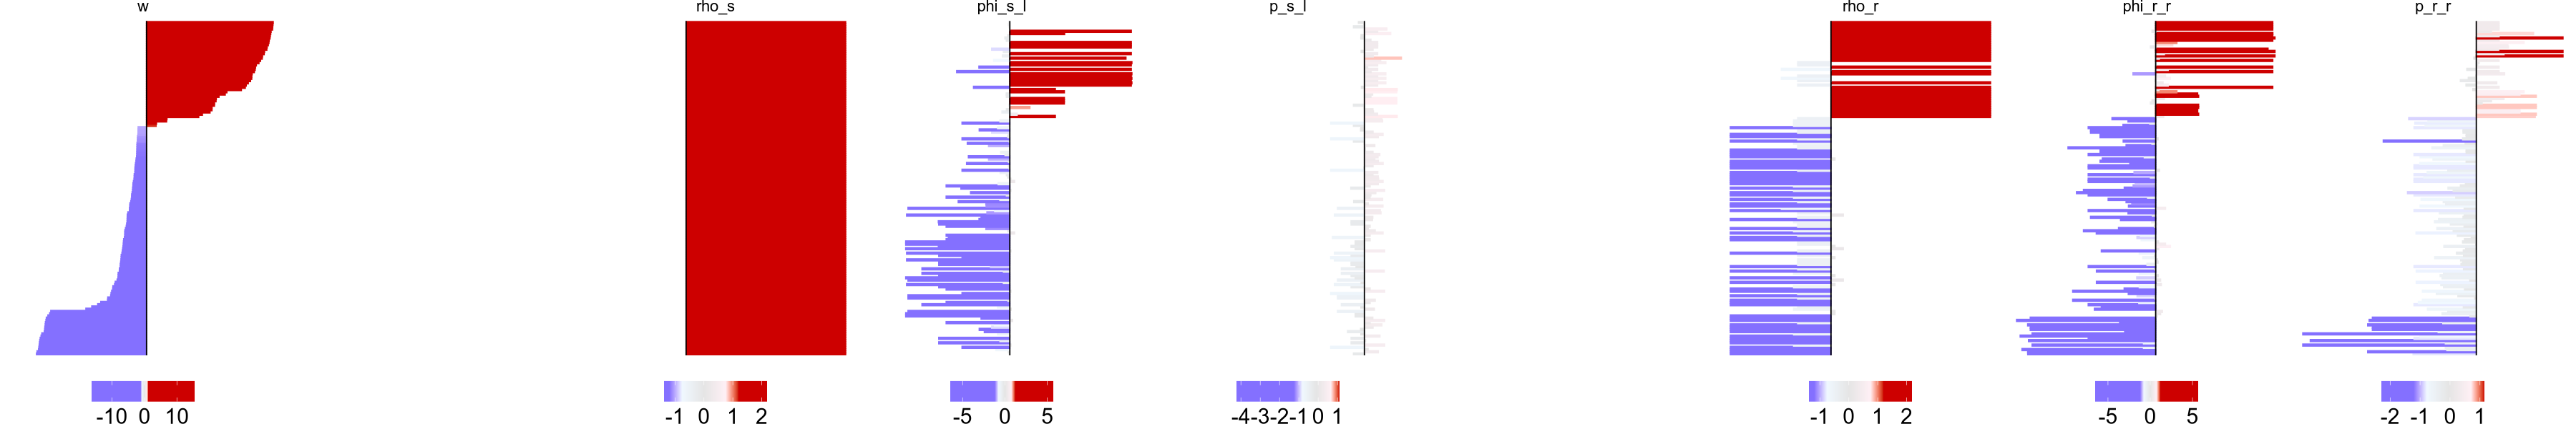

[1] "Cell Type: DC - Number of interactions: 732"


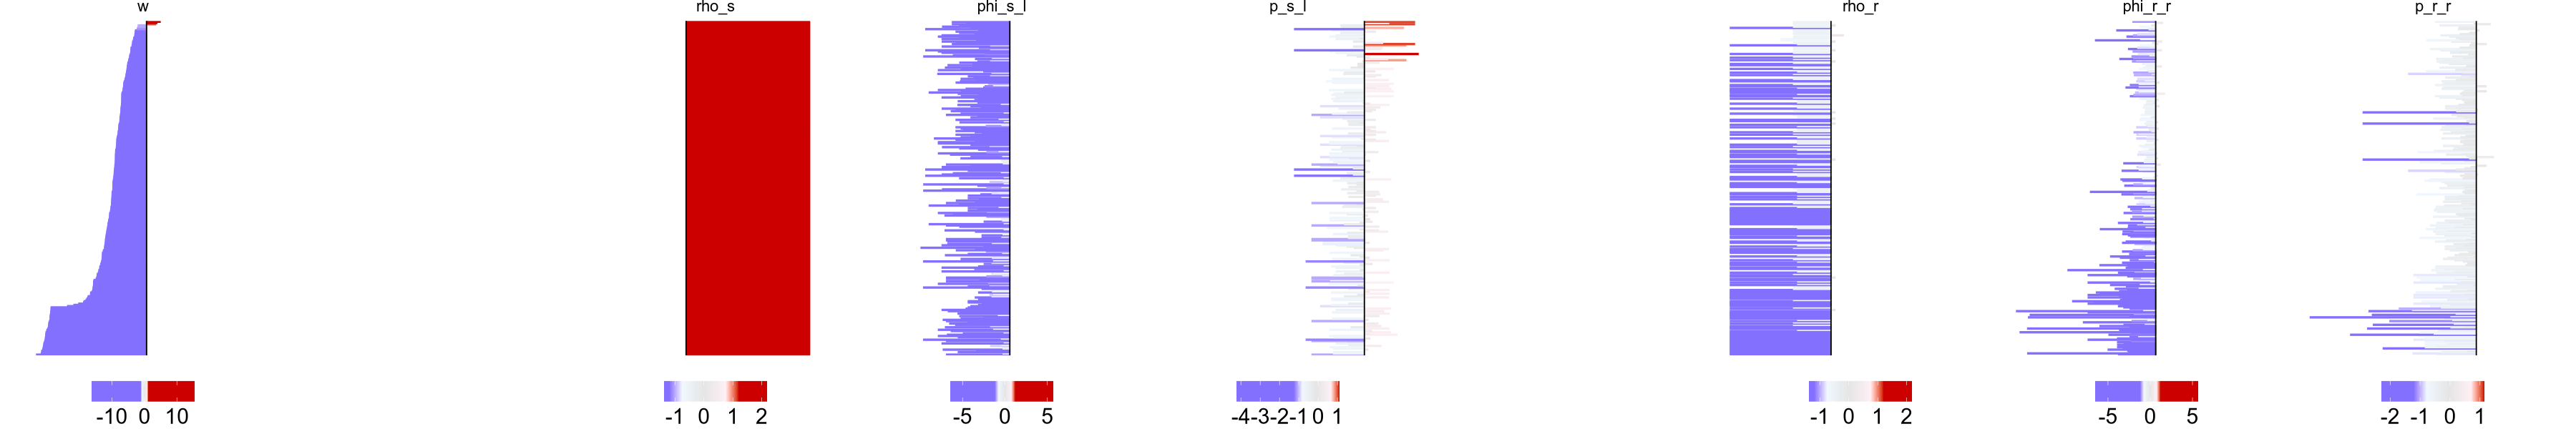

[1] "Total number of interactions across all sending cell types: 2664"


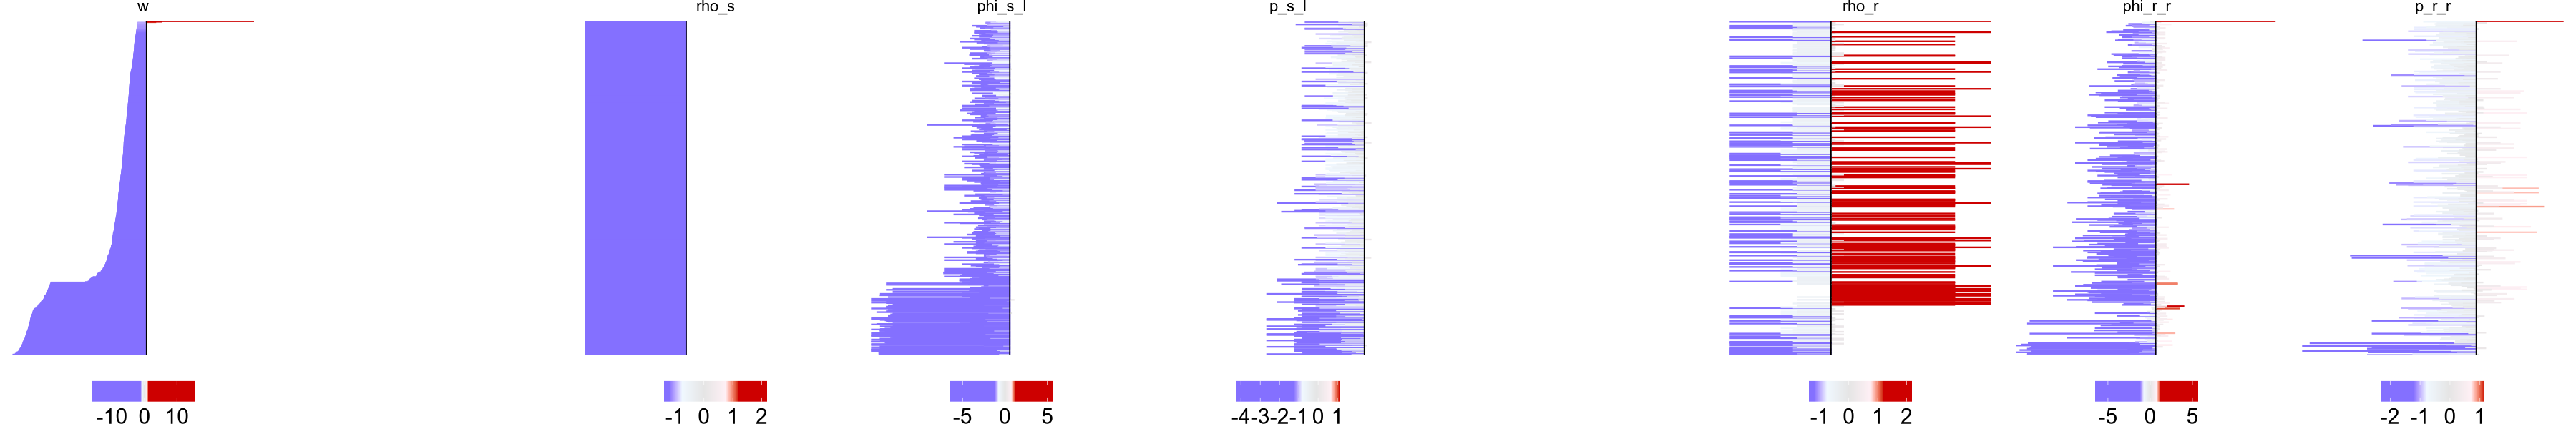

In [31]:
options(repr.plot.width = 30, repr.plot.height = 5)
sending_cell_types <- unique(interactions$anno_interactions$sending_cell_type)

# Initialize the counter
total_interaction_count_sending <- 0

for(cell_type in sending_cell_types) {
    my_anno_interactions <- interactions$anno_interactions[interactions$anno_interactions$sending_cell_type == cell_type & interactions$anno_interactions$interaction_ID %in% IDs, ]
    
    interaction_count <- nrow(my_anno_interactions)

    
    if(interaction_count > 0) {
        my_anno_interactions$interaction_ID <- factor(my_anno_interactions$interaction_ID, ordered = TRUE)
        sorted_indices <- order(my_anno_interactions$log2FC_weights)
        my_anno_interactions <- my_anno_interactions[sorted_indices, ]
        
        # Add the interaction count for this cell type to the total counter
        total_interaction_count_sending <- total_interaction_count_sending + interaction_count
        
        print(paste("Cell Type:", cell_type, "- Number of interactions:", interaction_count))
            
        # Plotting for the current cell_type
        plot_all_forests(my_idx = rep(TRUE, interaction_count),
                         my_anno_interactions = my_anno_interactions,
                         keep_order = TRUE,
                         threshold = 1,
                         legend_title_size = 0,
                         legend_text_size = 18,
                         component_lim = component_lim
                        )
    }
}
# Print the total sum of the count of all interactions at the end
print(paste("Total number of interactions across all sending cell types:", total_interaction_count_sending))

[1] "Cell Type: Mono - Number of interactions: 441"
[1] "Cell Type: Gran - Number of interactions: 502"


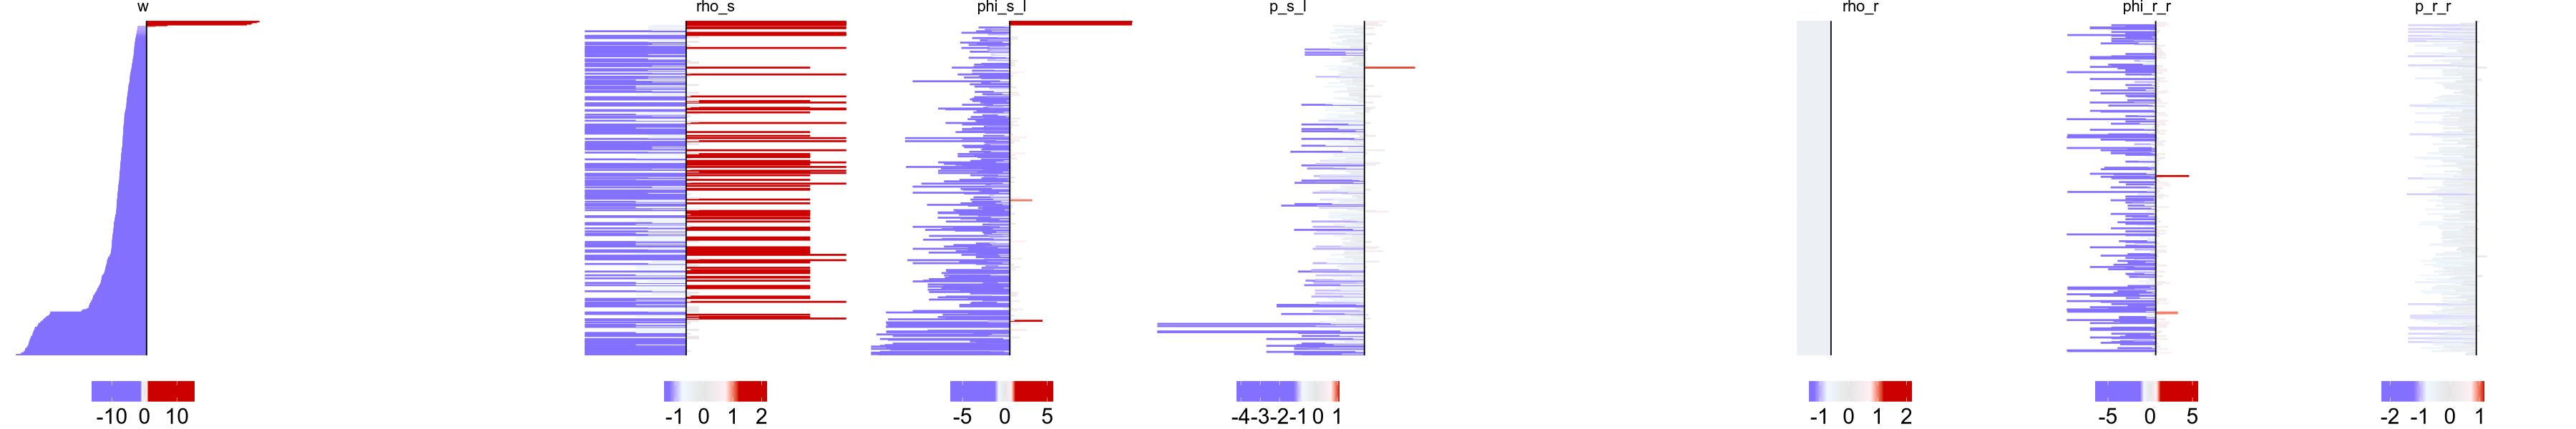

[1] "Cell Type: T - Number of interactions: 132"


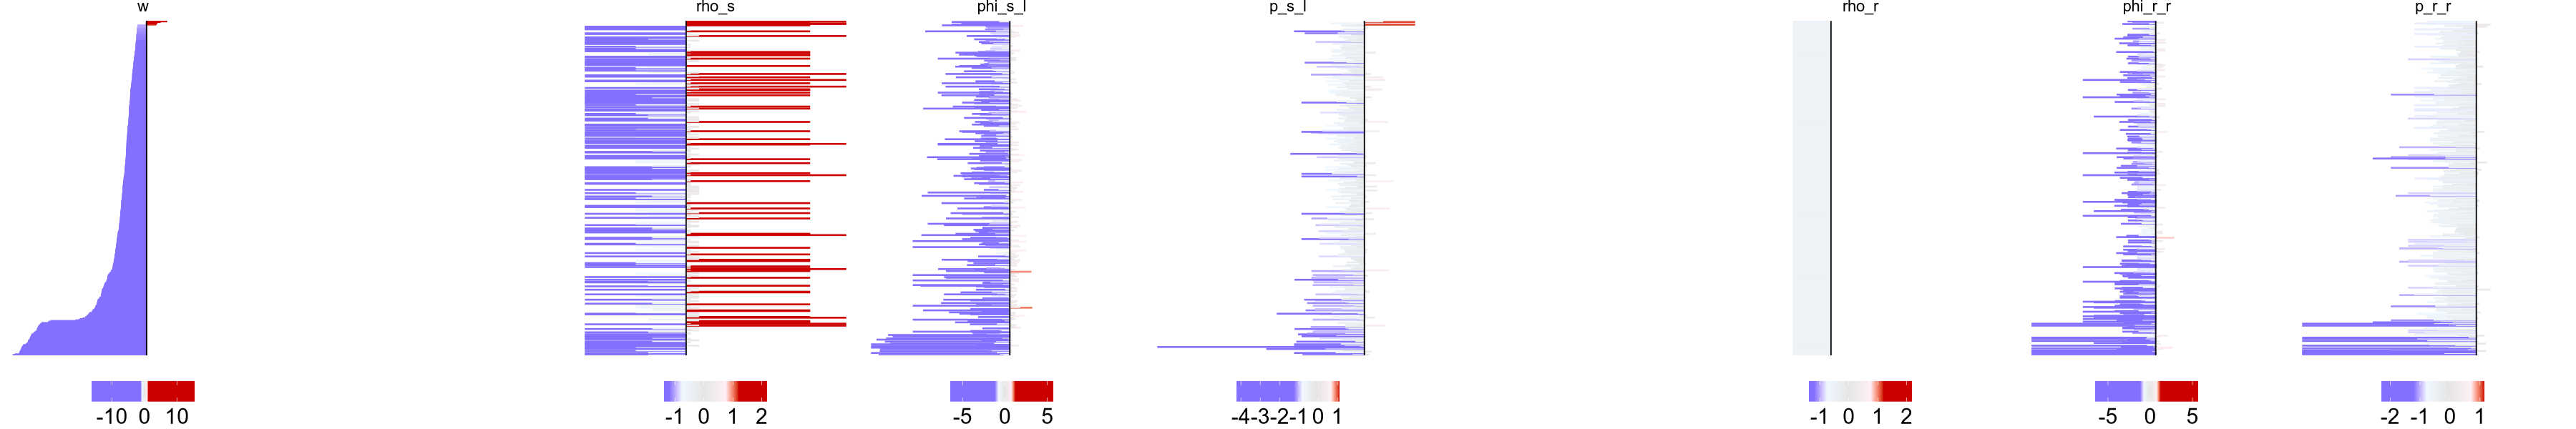

[1] "Cell Type: NK - Number of interactions: 149"


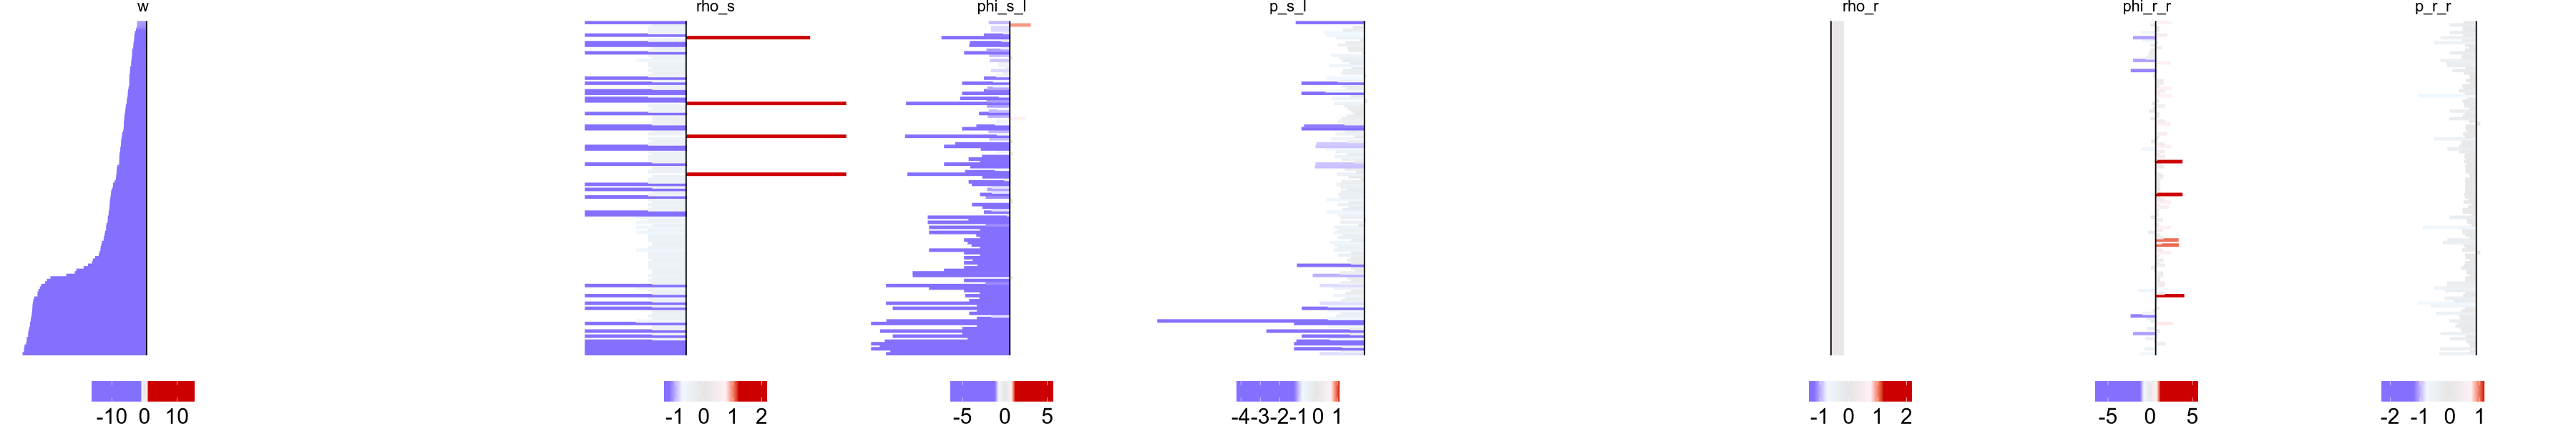

[1] "Cell Type: B - Number of interactions: 166"


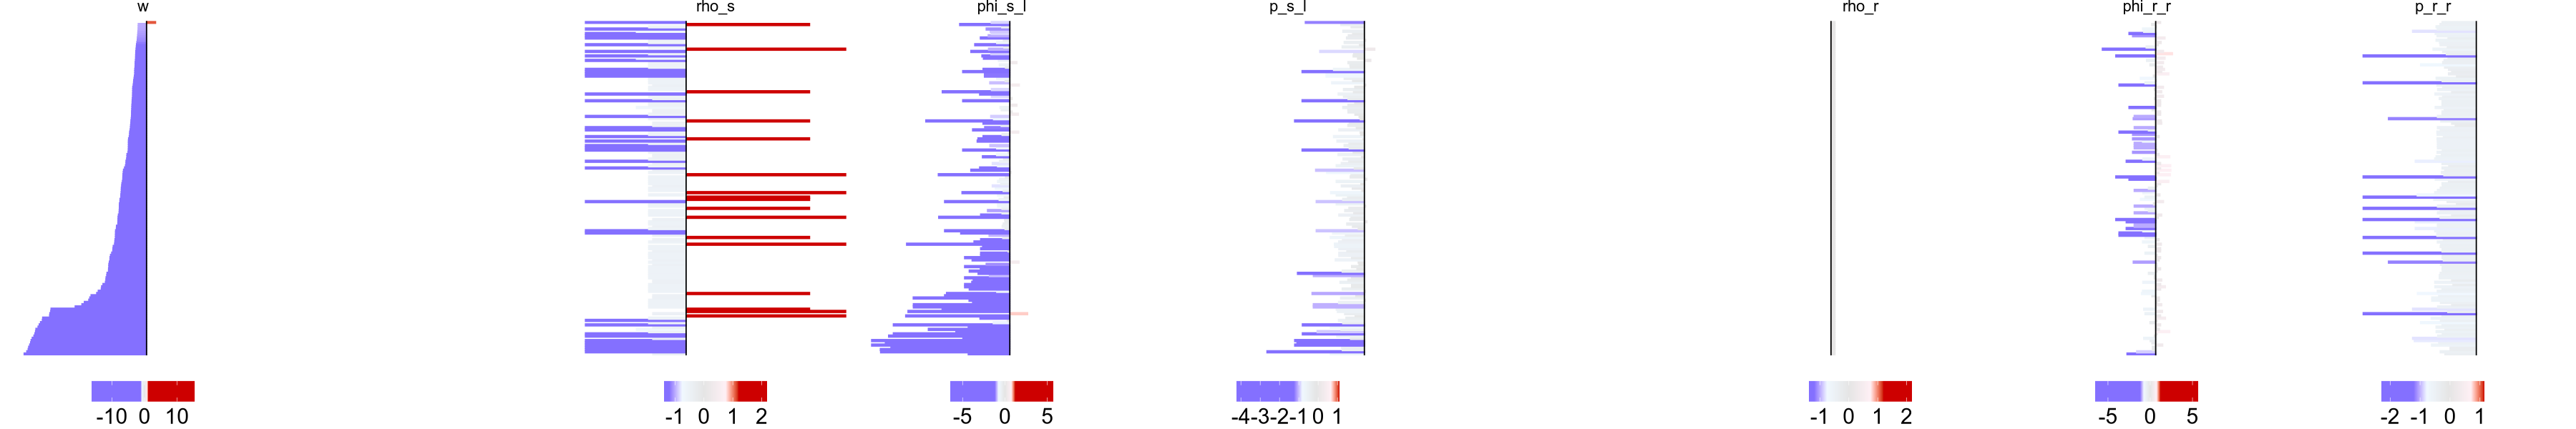

[1] "Cell Type: HSPC - Number of interactions: 159"


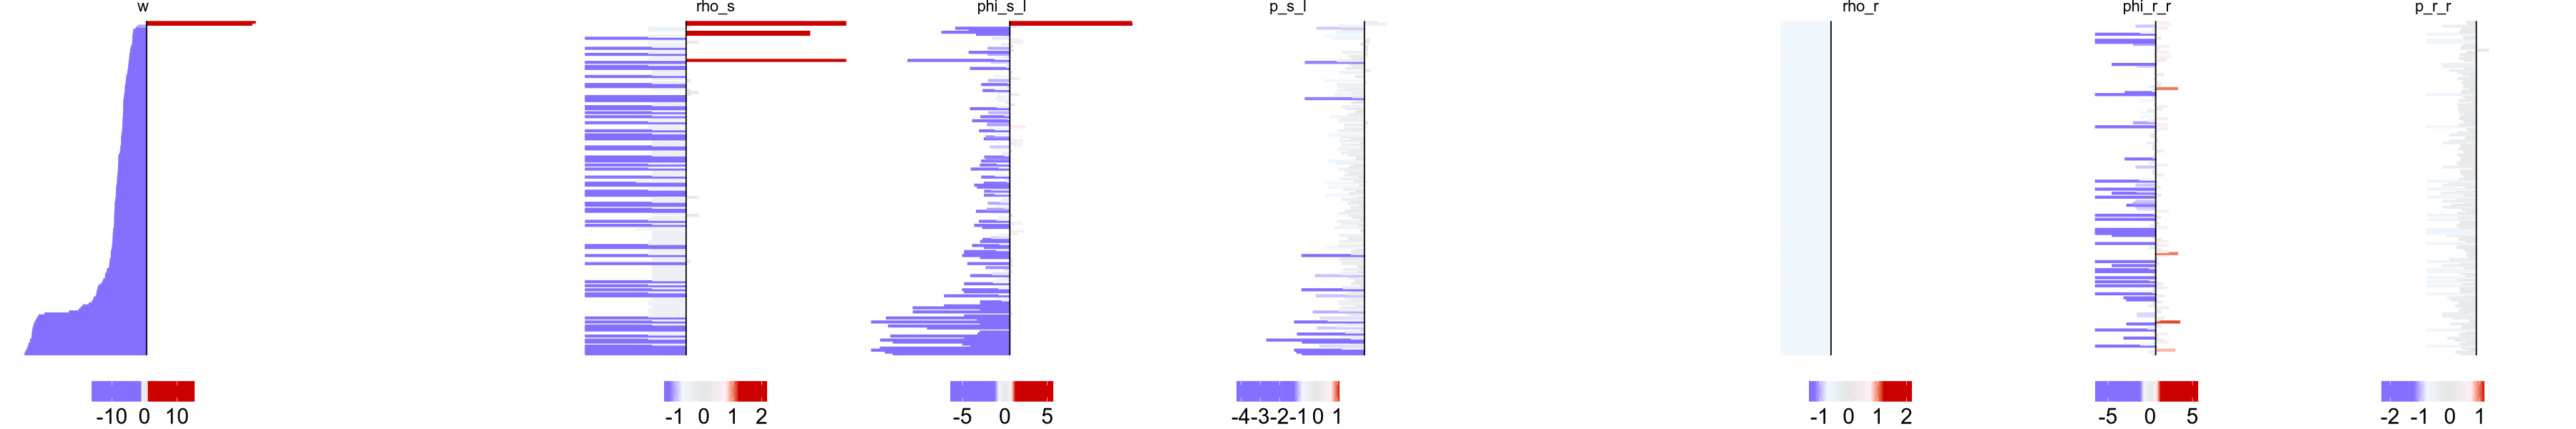

[1] "Cell Type: Ery - Number of interactions: 218"


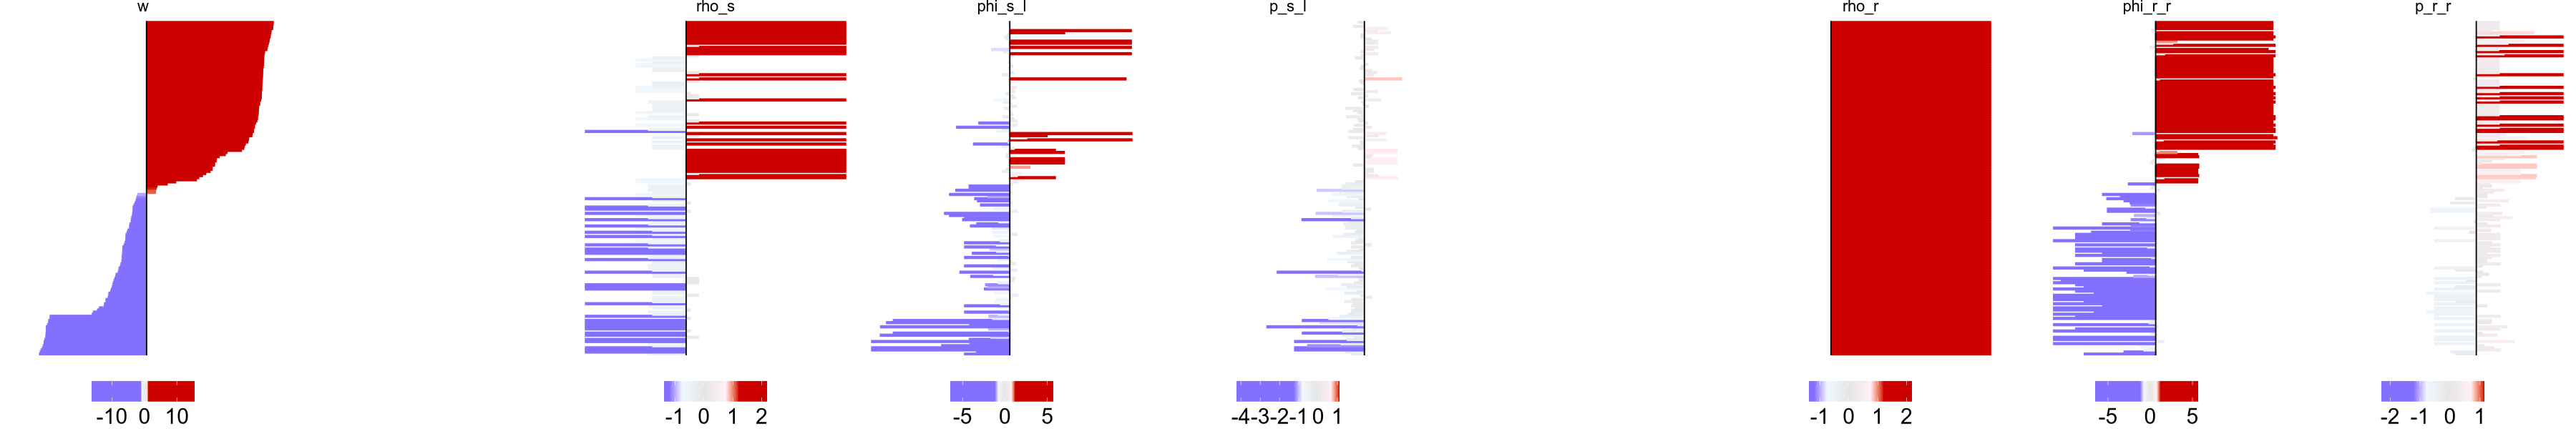

[1] "Cell Type: DC - Number of interactions: 897"


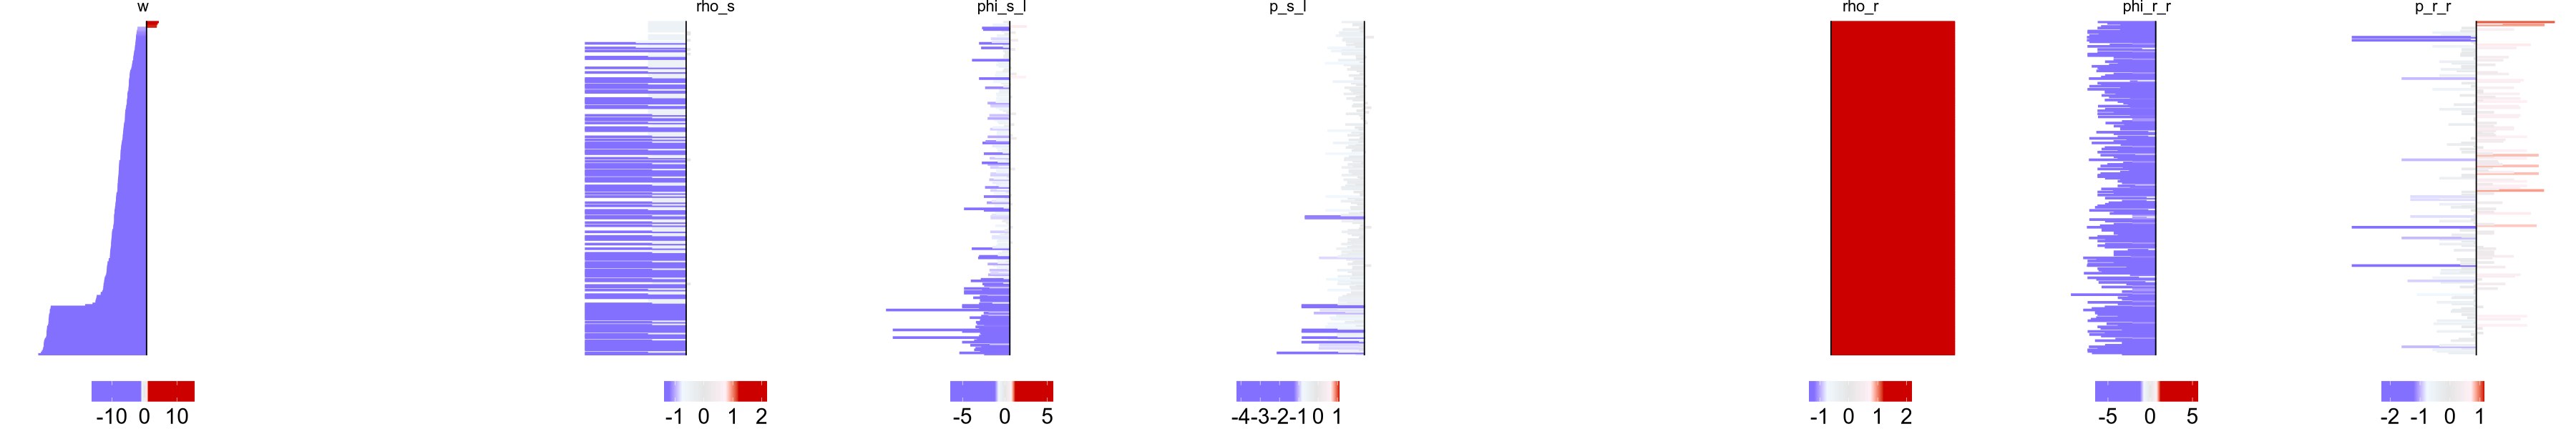

[1] "Total number of interactions across all receiving cell types: 2664"


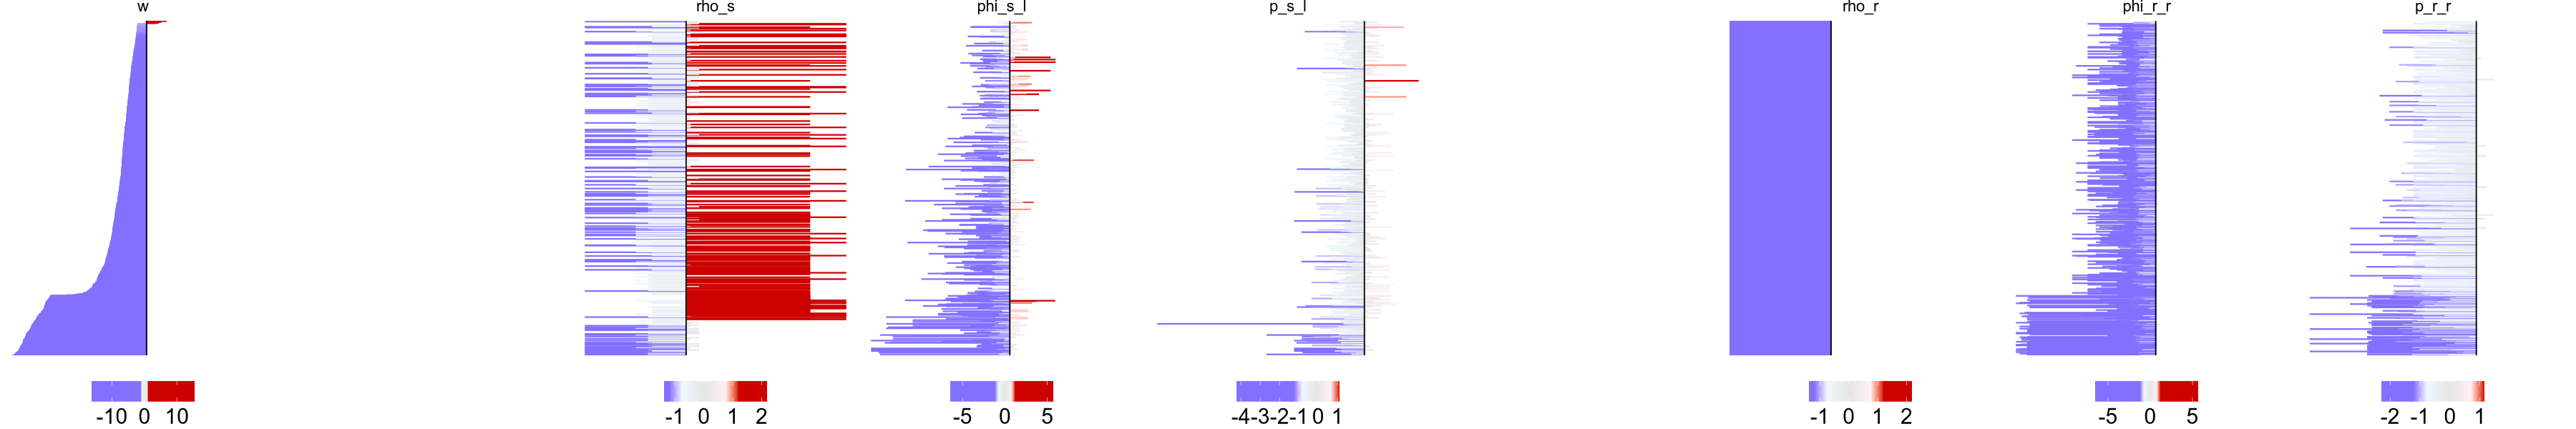

In [29]:
options(repr.plot.width = 30, repr.plot.height = 5)
receiving_cell_types <- unique(interactions$anno_interactions$receiving_cell_type)

# Initialize the counter
total_interaction_count <- 0

for(cell_type in receiving_cell_types) {
    my_anno_interactions <- interactions$anno_interactions[interactions$anno_interactions$receiving_cell_type == cell_type & interactions$anno_interactions$interaction_ID %in% IDs, ]
    
    interaction_count <- nrow(my_anno_interactions)
    
    if(interaction_count > 0) {
        my_anno_interactions$interaction_ID <- factor(my_anno_interactions$interaction_ID, ordered = TRUE)
        
        # Add the interaction count for this cell type to the total counter
        total_interaction_count <- total_interaction_count + interaction_count
        sorted_indices <- order(my_anno_interactions$log2FC_weights)
        my_anno_interactions <- my_anno_interactions[sorted_indices, ]
        
        print(paste("Cell Type:", cell_type, "- Number of interactions:", interaction_count))
            
        # Plotting for the current cell_type
        plot_all_forests(my_idx = rep(TRUE, interaction_count),
                         my_anno_interactions = my_anno_interactions,
                         keep_order = TRUE,
                         threshold = 1,
                         legend_title_size = 0,
                         legend_text_size = 18,
                         component_lim = component_lim
                        )
    }
}

# Print the total sum of the count of all interactions at the end
print(paste("Total number of interactions across all receiving cell types:", total_interaction_count))

[1] "Cell Type: Mono - Number of interactions: 31"
[1] "Cell Type: Gran - Number of interactions: 20"


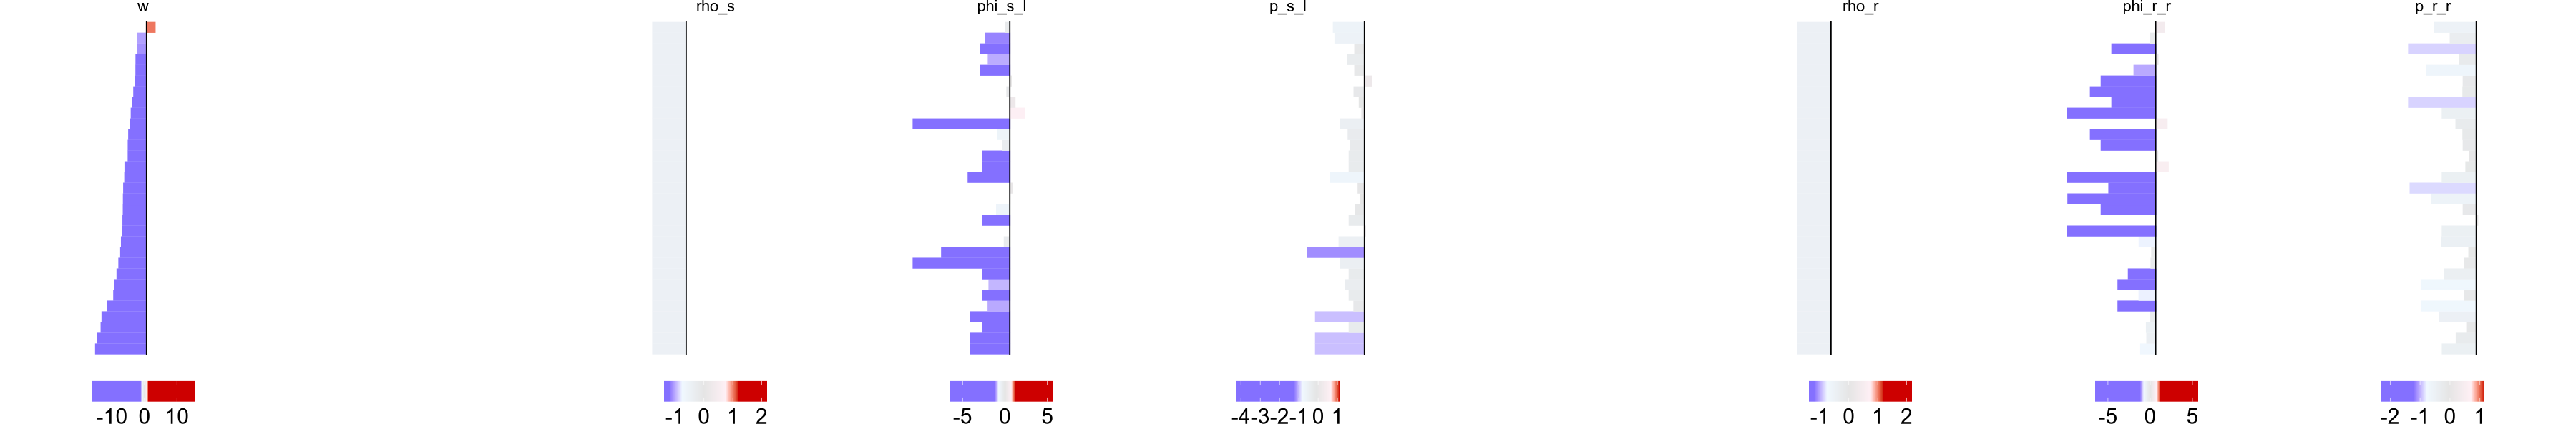

[1] "Cell Type: B - Number of interactions: 2"


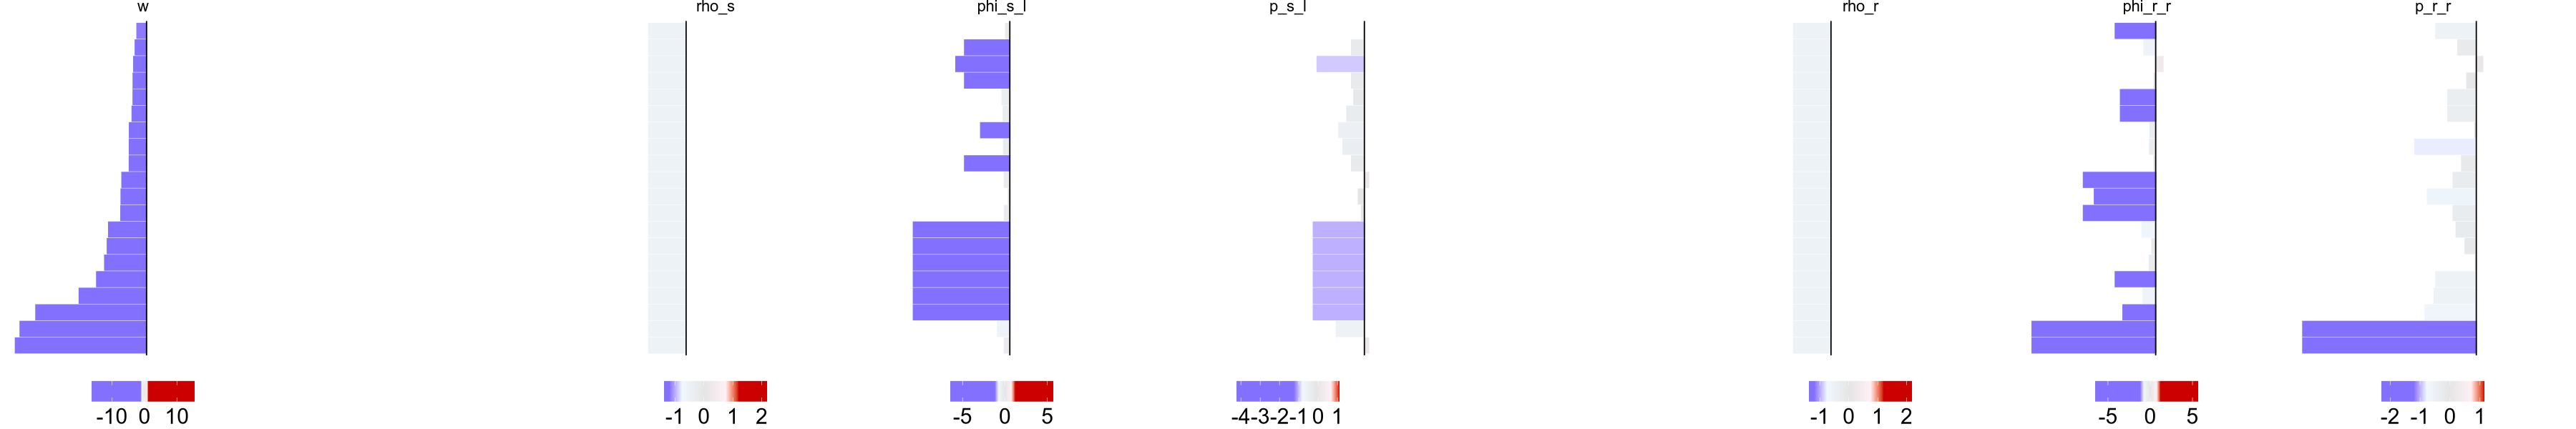

[1] "Cell Type: HSPC - Number of interactions: 36"


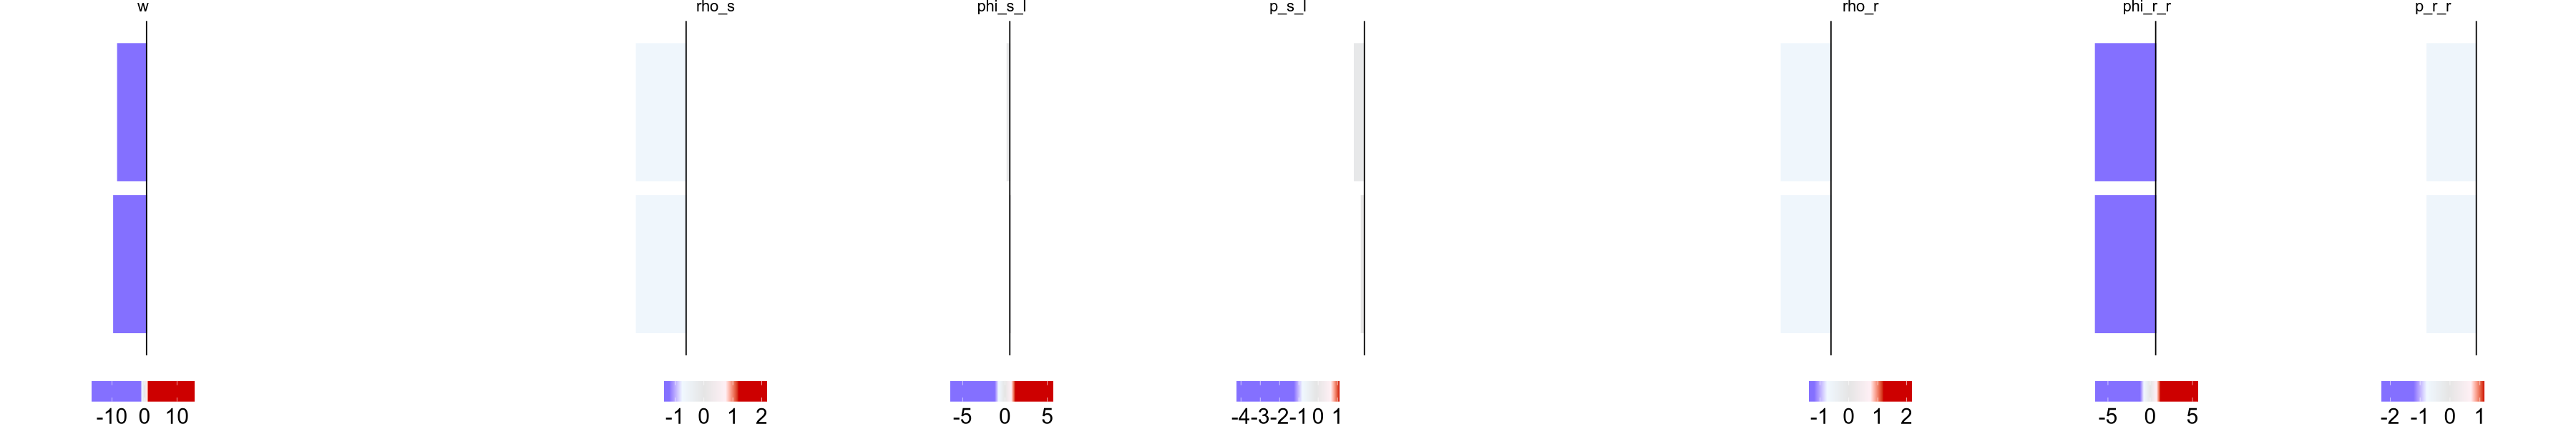

[1] "Cell Type: DC - Number of interactions: 117"


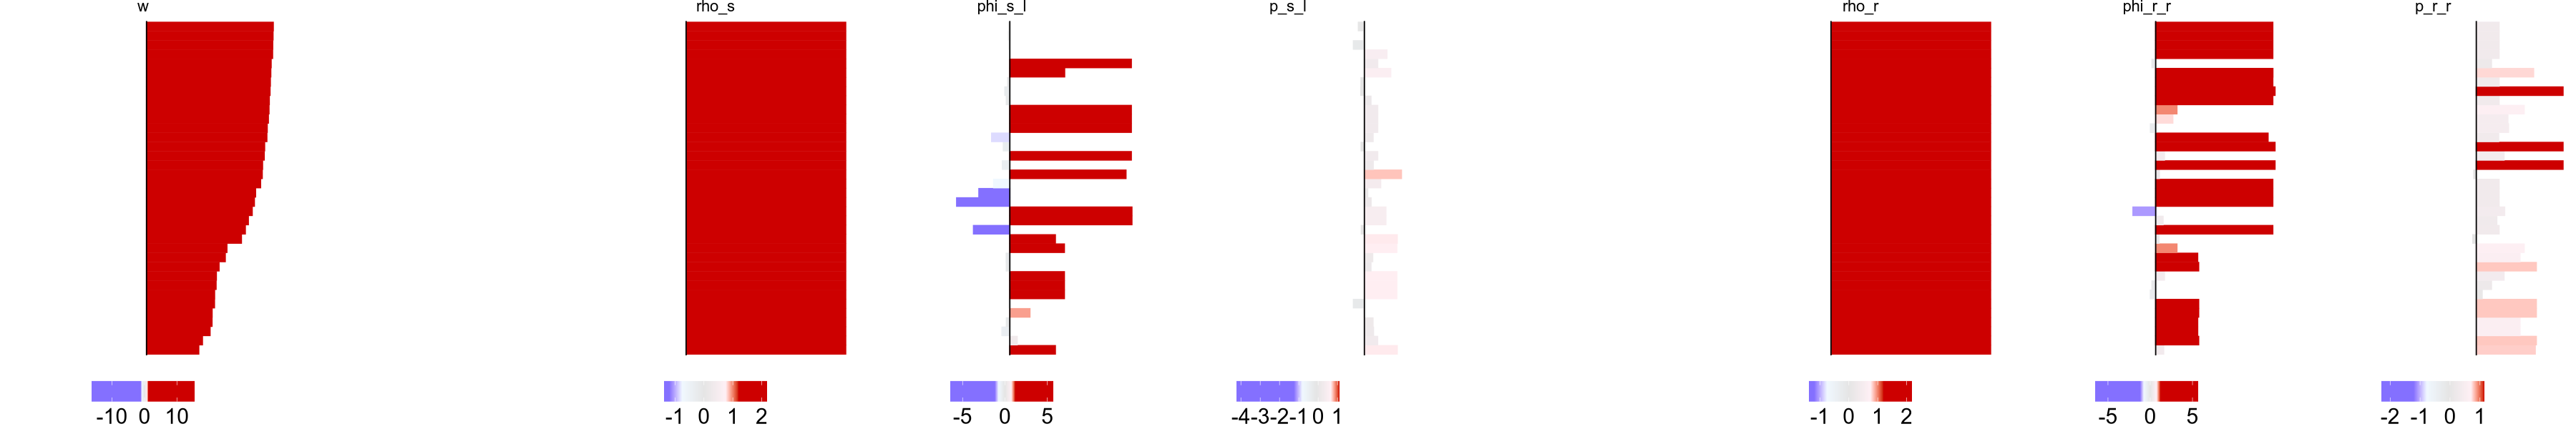

[1] "Total number of interactions for cell types acting both as sending and receiving: 0"


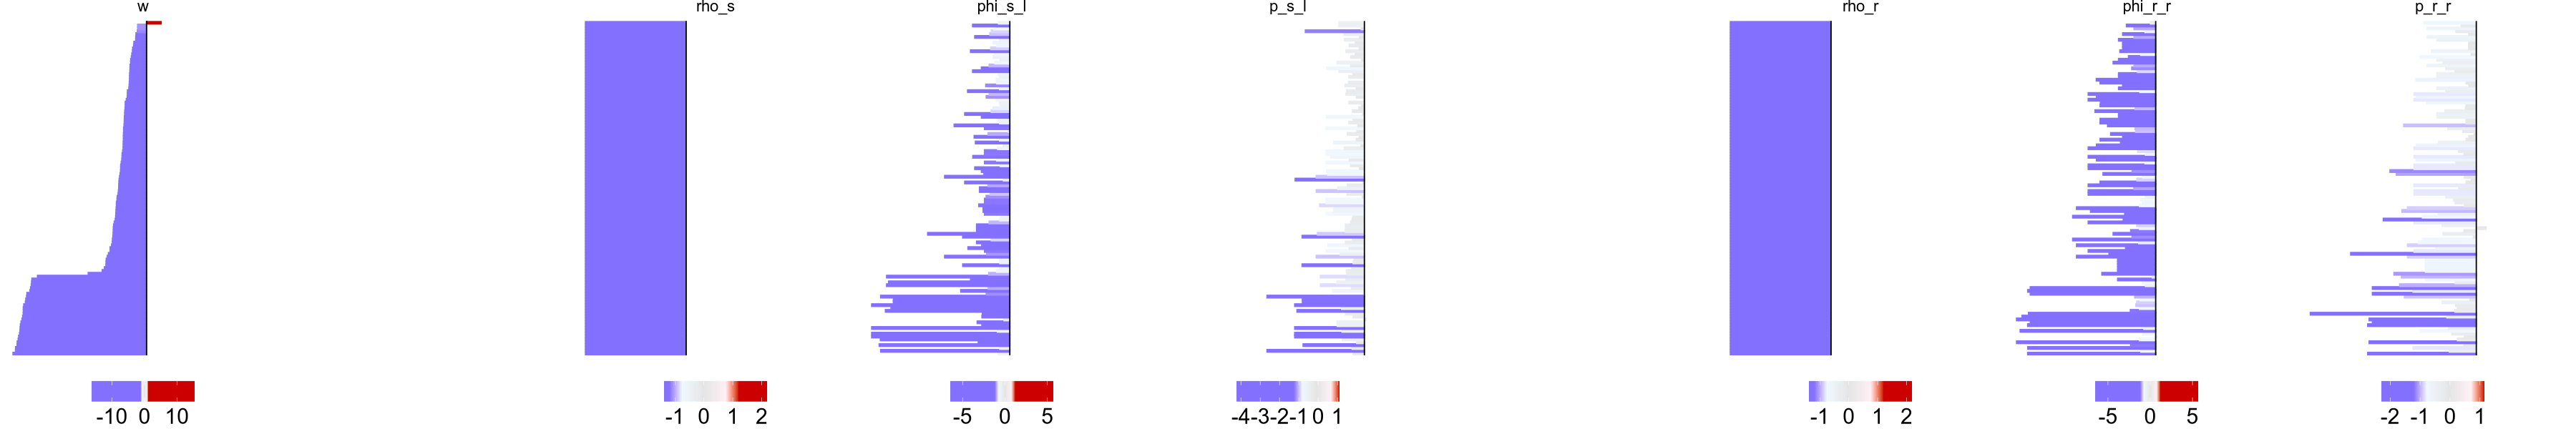

In [32]:
options(repr.plot.width = 30, repr.plot.height = 5)
receiving_cell_types <- unique(interactions$anno_interactions$receiving_cell_type)

both_cell_types <- unique(interactions$anno_interactions$receiving_cell_type)

# Initialize the counter
total_interaction_count_both <- 0

for(cell_type in both_cell_types) {
    my_anno_interactions <- interactions$anno_interactions[interactions$anno_interactions$receiving_cell_type == cell_type & interactions$anno_interactions$sending_cell_type == cell_type  & interactions$anno_interactions$interaction_ID %in% IDs, ]
    
    interaction_count <- nrow(my_anno_interactions)
    
    if(interaction_count > 0) {
        my_anno_interactions$interaction_ID <- factor(my_anno_interactions$interaction_ID, ordered = TRUE)
        
        # Add the interaction count for this cell type to the total counter
        total_interaction_count <- total_interaction_count + interaction_count
        sorted_indices <- order(my_anno_interactions$log2FC_weights)
        my_anno_interactions <- my_anno_interactions[sorted_indices, ]
        
        print(paste("Cell Type:", cell_type, "- Number of interactions:", interaction_count))
            
        # Plotting for the current cell_type
        plot_all_forests(my_idx = rep(TRUE, interaction_count),
                         my_anno_interactions = my_anno_interactions,
                         keep_order = TRUE,
                         threshold = 1,
                         legend_title_size = 0,
                         legend_text_size = 18,
                         component_lim = component_lim
                        )
    }
}

# Print the total sum of the count of all interactions at the end
print(paste("Total number of interactions for cell types acting both as sending and receiving:", total_interaction_count_both))

In [17]:
heatmap_list <- c("T:CALM1_HSPC:PDE1B",
"T:CALM2_HSPC:PDE1B",
"HSPC:CALM2_HSPC:PDE1B",
"HSPC:CALM1_HSPC:PDE1B",
"HSPC:CD47_HSPC:SIRPA",
"B:CALM2_HSPC:PDE1B",
"B:CALM1_HSPC:PDE1B",
"Mono:CALM1_HSPC:PDE1B",
"Mono:CALM3_HSPC:PDE1B",
"Mono:NRG1_Gran:NETO2",
"Mono:NRG1_Gran:MS4A4A",
"Mono:NRG1_Gran:HLA-DPB1",
"Mono:TNFSF14_Gran:LTBR",
"Mono:TNFSF14_Gran:TNFRSF14",
"Mono:TNFSF14_Mono:TNFRSF14",
"Mono:NRG1_Mono:SIGLEC7",
"Mono:HP_Gran:CD163",
"Mono:HP_Gran:ASGR2",
"Mono:HP_Gran:ASGR1")

In [18]:
# heatmap_list <- heatmap_list[length(heatmap_list):1]

In [19]:
heatmap_anno <- interactions$anno_interactions[interactions$anno_interactions$interaction_ID %in% heatmap_list,]

In [20]:
heatmap_anno <- heatmap_anno[match(heatmap_list, heatmap_anno$interaction_ID), ]

In [21]:
heatmap_anno$interaction_ID

[1] "T:CALM1_HSPC:PDE1B"         "T:CALM2_HSPC:PDE1B"        
 [3] "HSPC:CALM2_HSPC:PDE1B"      "HSPC:CALM1_HSPC:PDE1B"     
 [5] "HSPC:CD47_HSPC:SIRPA"       "B:CALM2_HSPC:PDE1B"        
 [7] "B:CALM1_HSPC:PDE1B"         "Mono:CALM1_HSPC:PDE1B"     
 [9] "Mono:CALM3_HSPC:PDE1B"      "Mono:NRG1_Gran:NETO2"      
[11] "Mono:NRG1_Gran:MS4A4A"      "Mono:NRG1_Gran:HLA-DPB1"   
[13] "Mono:TNFSF14_Gran:LTBR"     "Mono:TNFSF14_Gran:TNFRSF14"
[15] "Mono:TNFSF14_Mono:TNFRSF14" "Mono:NRG1_Mono:SIGLEC7"    
[17] "Mono:HP_Gran:CD163"         "Mono:HP_Gran:ASGR2"        
[19] "Mono:HP_Gran:ASGR1"

In [22]:
heatmap_anno$log2FC_weights

[1]  14.752847  14.249023  15.009031  14.350486   7.717569  13.481025
 [7]  14.004073  12.303865  11.812500  -6.401322  -5.868771  -6.278285
[13]  -3.641691  -3.553191  -3.353679  -5.935017 -13.203857  -5.682046
[19]  -4.986048

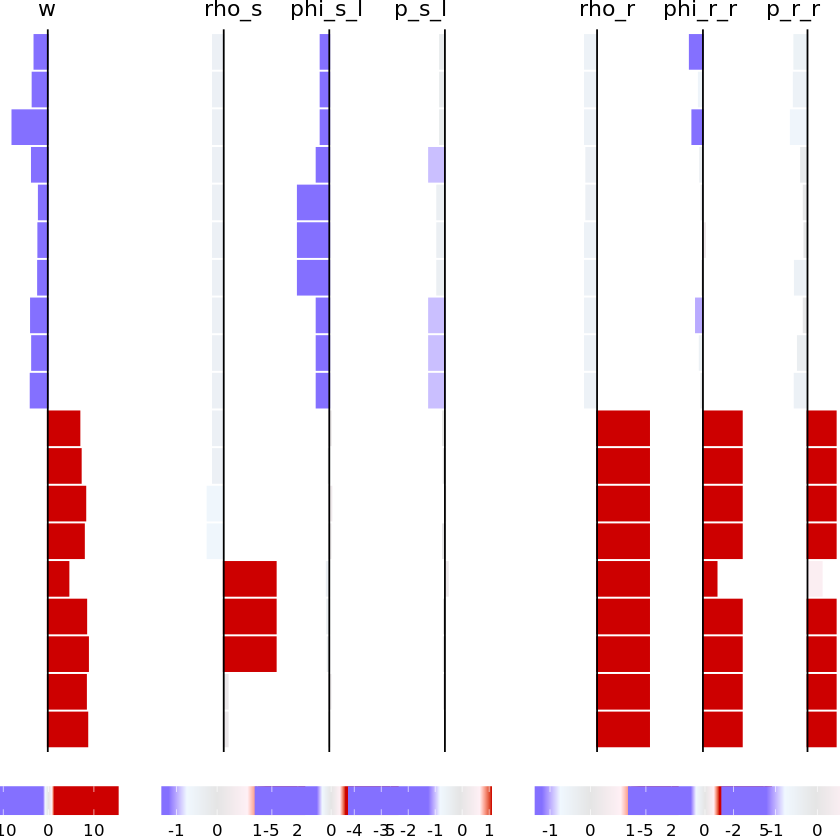

In [23]:
plot_all_forests(my_idx = rep(TRUE,nrow(heatmap_anno))
                     ,my_anno_interactions = heatmap_anno
                     ,keep_order = TRUE
                     ,threshold = 1
                     ,legend_title_size = 0
                     ,legend_text_size = 10
                     , component_lim = component_lim
                    )

In [27]:
component_lim <- find_component_limits(heatmap_anno, heatmap_anno$interaction_ID)

Warning message in min(of_interest$log2FC_weights):
“no non-missing arguments to min; returning Inf”
Warning message in max(of_interest$log2FC_weights):
“no non-missing arguments to max; returning -Inf”
Warning message in min(of_interest$log2FC_rho_s):
“no non-missing arguments to min; returning Inf”
Warning message in max(of_interest$log2FC_rho_s):
“no non-missing arguments to max; returning -Inf”
Warning message in min(of_interest$log2FC_phi_s_l):
“no non-missing arguments to min; returning Inf”
Warning message in max(of_interest$log2FC_phi_s_l):
“no non-missing arguments to max; returning -Inf”
Warning message in min(of_interest$log2FC_p_s_l):
“no non-missing arguments to min; returning Inf”
Warning message in max(of_interest$log2FC_p_s_l):
“no non-missing arguments to max; returning -Inf”
Warning message in min(of_interest$log2FC_rho_r):
“no non-missing arguments to min; returning Inf”
Warning message in max(of_interest$log2FC_rho_r):
“no non-missing arguments to max; returning -In

In [26]:
heatmap_anno$interaction_ID

[1] "T:CALM1_HSPC:PDE1B"         "T:CALM2_HSPC:PDE1B"        
 [3] "HSPC:CALM2_HSPC:PDE1B"      "HSPC:CALM1_HSPC:PDE1B"     
 [5] "HSPC:CD47_HSPC:SIRPA"       "B:CALM2_HSPC:PDE1B"        
 [7] "B:CALM1_HSPC:PDE1B"         "Mono:CALM1_HSPC:PDE1B"     
 [9] "Mono:CALM3_HSPC:PDE1B"      "Mono:NRG1_Gran:NETO2"      
[11] "Mono:NRG1_Gran:MS4A4A"      "Mono:NRG1_Gran:HLA-DPB1"   
[13] "Mono:TNFSF14_Gran:LTBR"     "Mono:TNFSF14_Gran:TNFRSF14"
[15] "Mono:TNFSF14_Mono:TNFRSF14" "Mono:NRG1_Mono:SIGLEC7"    
[17] "Mono:HP_Gran:CD163"         "Mono:HP_Gran:ASGR2"        
[19] "Mono:HP_Gran:ASGR1"

In [35]:
idx_log2FC_w_min <- heatmap_anno$log2FC_weights == min(heatmap_anno$log2FC_weights)
idx_log2FC_w_max <- heatmap_anno$log2FC_weights == max(heatmap_anno$log2FC_weights)

idx_log2FC_rho_s_min <- heatmap_anno$log2FC_rho_s == min(heatmap_anno$log2FC_rho_s)
idx_log2FC_rho_s_max <- heatmap_anno$log2FC_rho_s == max(heatmap_anno$log2FC_rho_s)

idx_log2FC_phi_s_min <- heatmap_anno$log2FC_phi_s_l == min(heatmap_anno$log2FC_phi_s_l)
idx_log2FC_phi_s_max <- heatmap_anno$log2FC_phi_s_l == max(heatmap_anno$log2FC_phi_s_l)

idx_log2FC_p_s_min <- heatmap_anno$log2FC_p_s_l == min(heatmap_anno$log2FC_p_s_l)
idx_log2FC_p_s_max <- heatmap_anno$log2FC_p_s_l == max(heatmap_anno$log2FC_p_s_l)

idx_log2FC_rho_r_min <- heatmap_anno$log2FC_rho_r == min(heatmap_anno$log2FC_rho_r)
idx_log2FC_rho_r_max <- heatmap_anno$log2FC_rho_r == max(heatmap_anno$log2FC_rho_r)

idx_log2FC_phi_r_min <- heatmap_anno$log2FC_phi_r_r == min(heatmap_anno$log2FC_phi_r_r)
idx_log2FC_phi_r_max <- heatmap_anno$log2FC_phi_r_r == max(heatmap_anno$log2FC_phi_r_r)

idx_log2FC_p_r_min <- heatmap_anno$log2FC_p_r_r == min(heatmap_anno$log2FC_p_r_r)
idx_log2FC_p_r_max <- heatmap_anno$log2FC_p_r_r == max(heatmap_anno$log2FC_p_r_r)

In [38]:
component_lim <- list(log2FC_w_min = heatmap_anno$log2FC_weights[idx_log2FC_w_min][1]
                ,log2FC_w_max = heatmap_anno$log2FC_weights[idx_log2FC_w_max][1]

                ,log2FC_rho_s_min = heatmap_anno$log2FC_rho_s[idx_log2FC_rho_s_min][1]
                ,log2FC_rho_s_max = heatmap_anno$log2FC_rho_s[idx_log2FC_rho_s_max][1]
    
                ,log2FC_phi_s_min = heatmap_anno$log2FC_phi_s_l[idx_log2FC_phi_s_min][1]
                ,log2FC_phi_s_max = heatmap_anno$log2FC_phi_s_l[idx_log2FC_phi_s_max][1]
    
                ,log2FC_p_s_min = heatmap_anno$log2FC_p_s_l[idx_log2FC_p_s_min][1]
                ,log2FC_p_s_max = heatmap_anno$log2FC_p_s_l[idx_log2FC_p_s_max][1]
    
                ,log2FC_rho_r_min = heatmap_anno$log2FC_rho_r[idx_log2FC_rho_r_min][1]
                ,log2FC_rho_r_max = heatmap_anno$log2FC_rho_r[idx_log2FC_rho_r_max][1]
    
                ,log2FC_phi_r_min = heatmap_anno$log2FC_phi_r_r[idx_log2FC_phi_r_min][1]
                ,log2FC_phi_r_max = heatmap_anno$log2FC_phi_r_r[idx_log2FC_phi_r_max][1]
    
                ,log2FC_p_r_min = heatmap_anno$log2FC_p_r_r[idx_log2FC_p_r_min][1]
                ,log2FC_p_r_max = heatmap_anno$log2FC_p_r_r[idx_log2FC_p_r_max][1]
            ) 

In [47]:
heatmap_list <- heatmap_list[length(heatmap_list):1]

In [49]:
heatmap_anno <- interactions$anno_interactions[interactions$anno_interactions$interaction_ID %in% heatmap_list,]

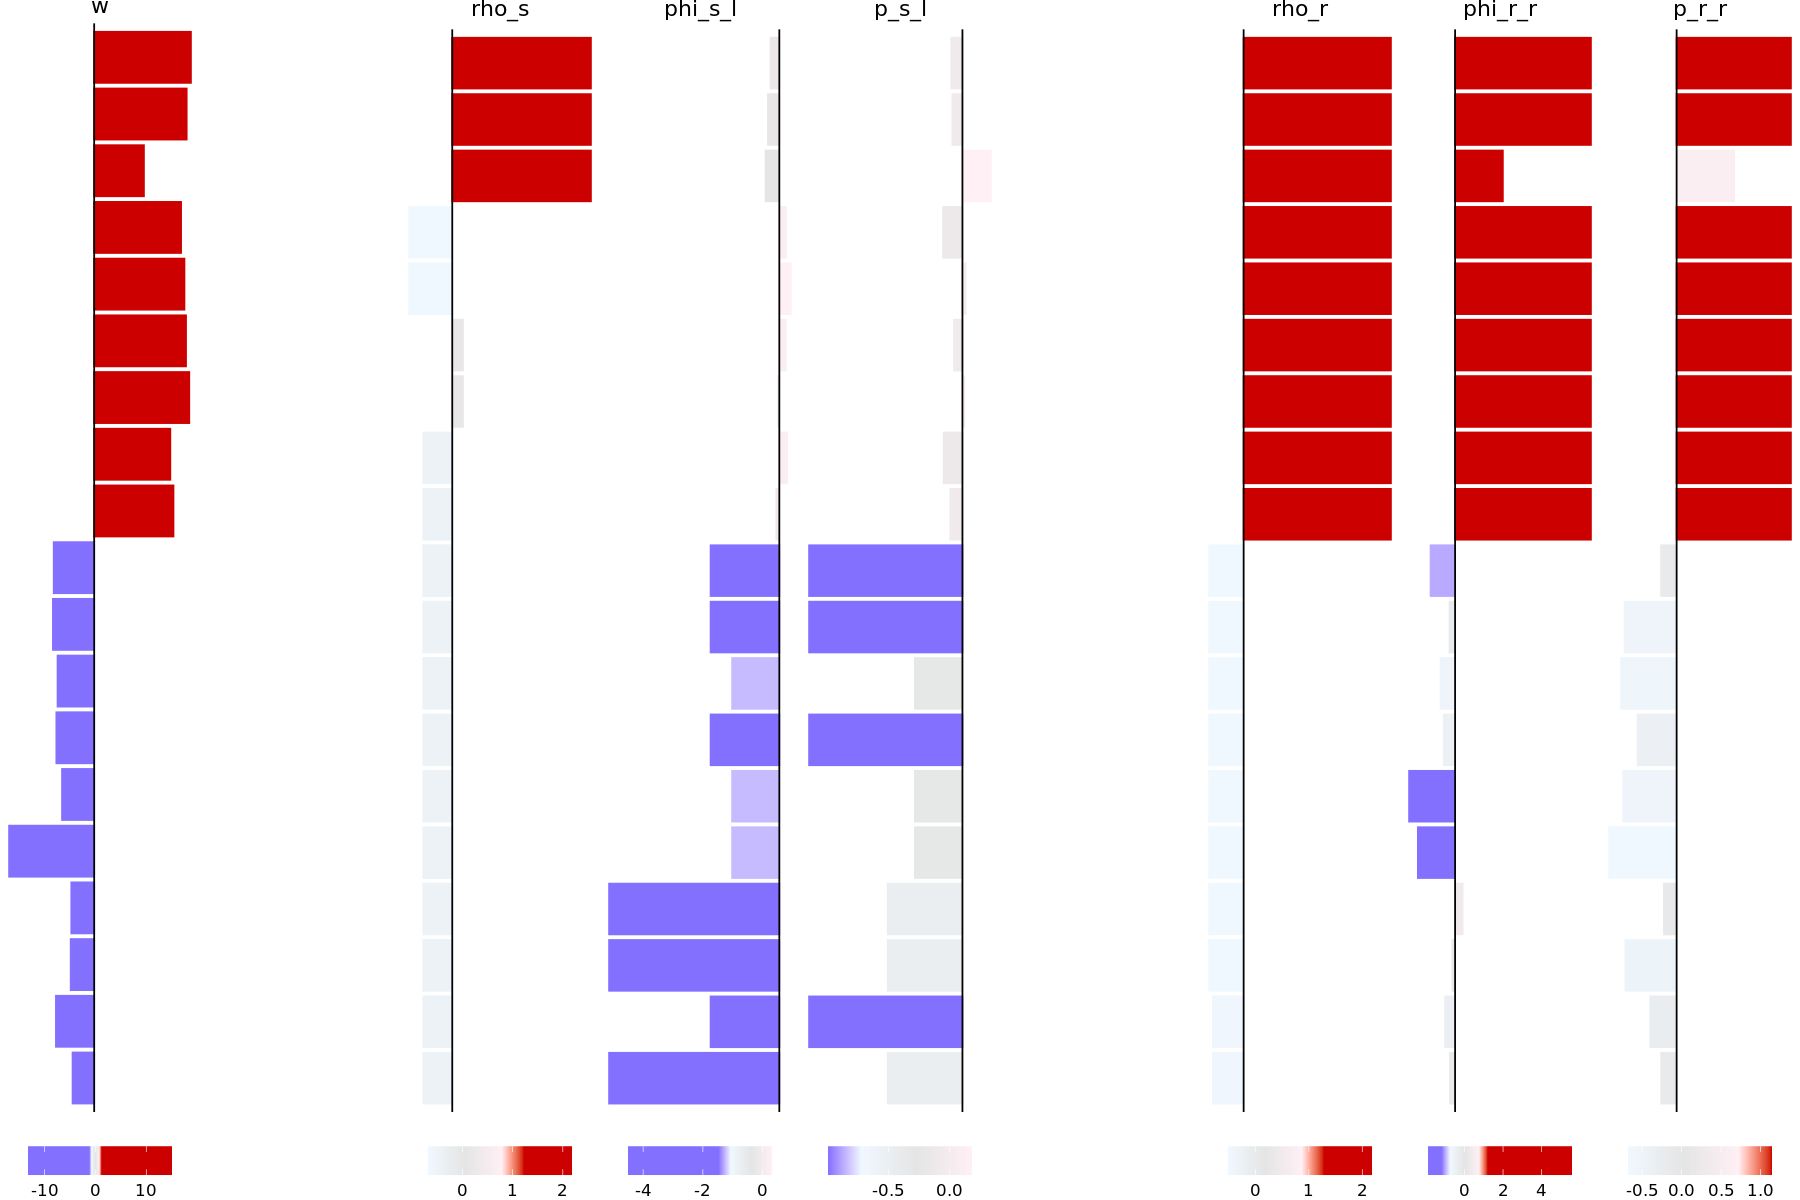

In [50]:
options(repr.plot.width = 15
        ,repr.plot.height = 10)
plot_all_forests(my_idx = rep(TRUE,nrow(heatmap_anno))
                     ,my_anno_interactions = heatmap_anno
                     ,keep_order = TRUE
                     ,threshold = 1
                     ,legend_title_size = 0
                     ,legend_text_size = 10
                     , component_lim = component_lim
                    )